# Agglomerative Clustering

Basically an MST algo  
Explanation: Each point is a cluster, merge with closest cluster until k clusters left

Importing necessary libraries

In [2]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons, make_circles

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
sns.set_palette(sns.color_palette("blend:blue,orange"))

Generating datasets

In [3]:
x_uniform: np.array = np.array([np.random.uniform(-1, 1, 1500), np.random.uniform(-1, 1, 1500)])
x_normal: np.array = np.array([
    np.concatenate([
        np.random.normal(0, .2, 500), 
        np.random.normal(1, .2, 500),
        np.random.normal(-0.7, .2, 500),
        np.random.normal(1, .2, 500)
    ]), 
    np.concatenate([
        np.random.normal(0, .2, 500), 
        np.random.normal(1, .2, 500),
        np.random.normal(-2, .2, 500),
        np.random.normal(0, .2, 500)
    ])])
x_circles = make_circles((500, 200), noise=.025)[0].T
x_moons = make_moons((500, 250), noise=.1)[0].T

data = [x_uniform, x_normal, x_circles, x_moons]

Making the plotting process easier

In [6]:
def plot(x: list[np.array], hue: list[np.array]) -> None:
    fig, ax = plt.subplots(1, len(x), figsize=(16,4))
    
    for i, df in enumerate(x):
        sns.scatterplot(*df, hue=hue[i], ax=ax[i], palette = sns.color_palette("bright", n_colors=len(np.unique(hue[i]))))
        
    fig.suptitle(f"Clustering with Agglomerative Clustering")
    plt.show()

Fitting the model and clustering

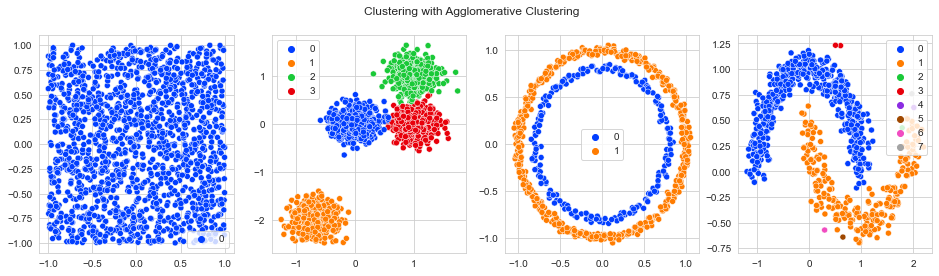

In [31]:
predictions = []

for i, df in enumerate(data):
    model = AgglomerativeClustering(distance_threshold=[3, 0.75, 0.088, 0.121][i], compute_full_tree=True, n_clusters=None, linkage=["average", "average", "single", "single"][i])
    predictions.append(model.fit_predict(df.T))
    
plot(data, predictions)

# Conclusion

Quite reliable